In [ ]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import StandardScaler, normalize
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
from sklearn import metrics
from sklearn.cluster import KMeans


In [ ]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 0.22.2.post1
Uninstalling scikit-learn-0.22.2.post1:
  Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 23.1 MB 5.3 kB/s 


**Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "drive/MyDrive/football_data.csv"

data = pd.read_csv(path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
all_columns=set()
for i in data.columns:
  all_columns.add(i)

numeric_columns=set()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for i in data.select_dtypes(include=numerics):
  numeric_columns.add(i)

print(all_columns.difference(numeric_columns))

{'CB', 'LCB', 'RW', 'Photo', 'Body Type', 'LCM', 'Flag', 'LDM', 'LB', 'RS', 'Position', 'CM', 'RAM', 'CDM', 'RM', 'Name', 'LWB', 'Club Logo', 'RB', 'LS', 'Release Clause', 'Preferred Foot', 'LM', 'LW', 'Value', 'Club', 'ST', 'Height', 'RWB', 'LAM', 'RCM', 'Work Rate', 'CF', 'RDM', 'RCB', 'Loaned From', 'Nationality', 'Wage', 'RF', 'LF', 'Contract Valid Until', 'CAM', 'Weight', 'Real Face', 'Joined'}


**Selecting all numerical columns**

In [ ]:
data=data.select_dtypes(['number']) 

In [ ]:
print(len(data.columns))

44


**Replacing nan values with mean of respective attributes**

In [ ]:
for i in data:
  data[i].fillna(data[i].mean(skipna=True), inplace = True)

In [ ]:
print(data.columns)

Index(['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')


**Dropping columns unnecessary for clustering based on skills**

In [ ]:
data=data.drop(['ID', 'Age', 'Overall', 'Potential', 'Special', 'International Reputation', 'Jersey Number', 'Unnamed: 0'],axis=1)

In [ ]:
print(len(data.columns))

36


**Preprocessing(Scaling,normalizing and reducing dimensions)**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

In [ ]:
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

In [ ]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

In [ ]:
print(X_principal)

             P1        P2
0     -0.804524  0.269649
1     -0.767098  0.160565
2     -0.782390  0.280821
3      0.640590  0.253590
4     -0.811563 -0.049520
...         ...       ...
18202  0.752831  0.248192
18203  0.798750  0.440023
18204  0.595118  0.685794
18205  0.534565  0.615302
18206  0.905011  0.122368

[18207 rows x 2 columns]


In [ ]:
print(len(data))

18207


**Visualizing Dendogram of the data**

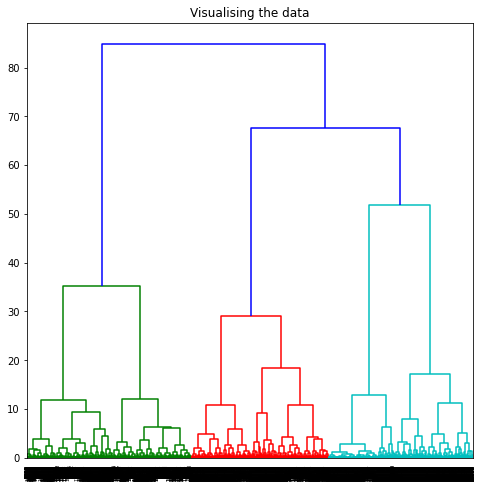

In [ ]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

**Agglomerative Clustering with 2 clusters**

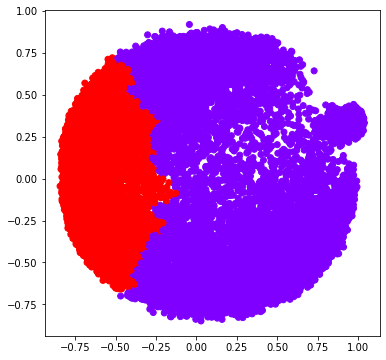

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = 2)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

**Agglomerative clustering with 3 clsuters**

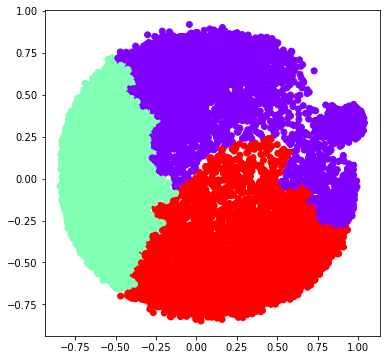

In [ ]:
ac3 = AgglomerativeClustering(n_clusters = 3)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()



**Agglomerative clustering with 4 clusters**

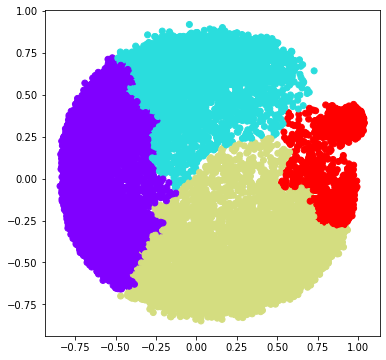

In [ ]:
ac4 = AgglomerativeClustering(n_clusters = 4)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

**Agglomerative clustering with 5 clusters**

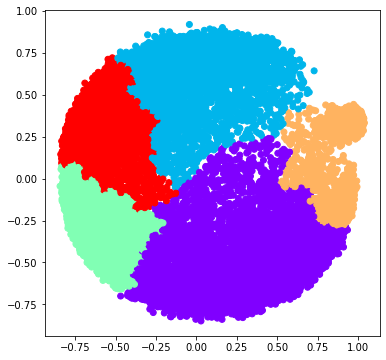

In [ ]:
ac5 = AgglomerativeClustering(n_clusters = 5)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

**Agglomerative clustering with 6 clusters**

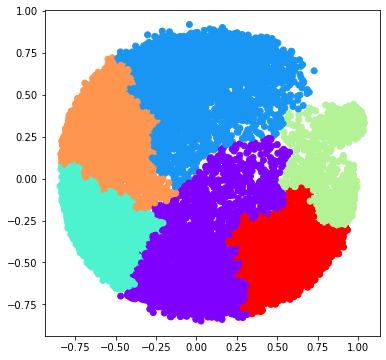

In [ ]:
ac6 = AgglomerativeClustering(n_clusters = 6)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

**Calculating silhouette scores of clustering and deciding optimal number of clusters**

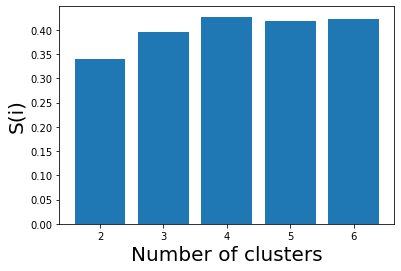

In [ ]:
k = [2,3,4,5,6]
  
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        metrics.silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        metrics.silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        metrics.silhouette_score(X_principal, ac4.fit_predict(X_principal)))

silhouette_scores.append(
        metrics.silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        metrics.silhouette_score(X_principal, ac6.fit_predict(X_principal)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()



**Optimal clusters are 4**

**Implementing general divisive algo till we get everypoint in  its own cluster**

Streaming output truncated to the last 5000 lines.
13157
13158
13159
13160
13161
13162
13163
13164
13165
13166
13167
13168
13169
13170
13171
13172
13173
13174
13175
13176
13177
13178
13179
13180
13181
13182
13183
13184
13185
13186
13187
13188
13189
13190
13191
13192
13193
13194
13195
13196
13197
13198
13199
13200
13201
13202
13203
13204
13205
13206
13207
13208
13209
13210
13211
13212
13213
13214
13215
13216
13217
13218
13219
13220
13221
13222
13223
13224
13225
13226
13227
13228
13229
13230
13231
13232
13233
13234
13235
13236
13237
13238
13239
13240
13241
13242
13243
13244
13245
13246
13247
13248
13249
13250
13251
13252
13253
13254
13255
13256
13257
13258
13259
13260
13261
13262
13263
13264
13265
13266
13267
13268
13269
13270
13271
13272
13273
13274
13275
13276
13277
13278
13279
13280
13281
13282
13283
13284
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
1

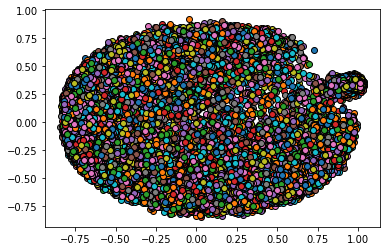

In [ ]:
import copy
def get_mean(data):
    return np.average(data, axis=0)

def get_error(data):
    return np.sum((data-np.average(data, axis=0))**2)

def get_best_split(data, dh_labels):

  mini = float("inf")
  mini_index = 0

  for i in range(0, np.unique(dh_labels).size):
    centre = np.mean(data[dh_labels==i], axis=0).T

    newon = np.sum(np.mean((data[dh_labels==i]-centre)**2, axis=0))
    if newon < mini :
      mini_index=i
      mini=newon
     
  return mini_index
def divisive_cluster(data):
  num_clusters = 3
  data_to_divide = data

  dh_labs = np.zeros(data.shape[0])
  cluster_to_divide=0
  clusters=[]
  errors=[]
  cou=0
  for i in range(len(data.values)):
    print(cou)
    kmodel = KMeans(n_clusters=2, random_state=0).fit(data_to_divide)
    dh_labels=kmodel.labels_
    clusters.append(data_to_divide[dh_labels==0])
    clusters.append(data_to_divide[dh_labels==1])
    if(len(clusters)==len(data.values)):
      break
    errors.append(get_error(np.array(data_to_divide[dh_labels==0])))
    errors.append(get_error(np.array(data_to_divide[dh_labels==1])))
    data_to_divide = clusters[errors.index(max(errors))]
   
    clusters.pop(errors.index(max(errors)))
    errors.pop(errors.index(max(errors)))
   
    if(len(data_to_divide.values)<2):
      break
    cou=cou+1
  col = 'k'
  for i in range(len(clusters)):
    plt.plot(clusters[i].iloc[:, 0], clusters[i].iloc[:, 1], 'o', 
              markeredgecolor='k',
              markersize=6)
  
  

    

divisive_cluster(X_principal)



**Implementing divisive algo to get 4 clusters**

> Indented block



0
1
2


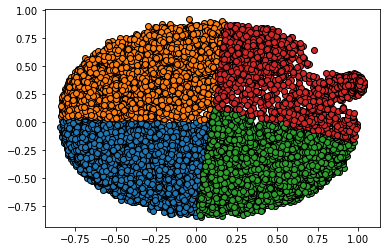

In [ ]:
import copy
def get_mean(data):
    return np.average(data, axis=0)

def get_error(data):
    return np.sum((data-np.average(data, axis=0))**2)

def get_best_split(data, dh_labels):

  mini = float("inf")
  mini_index = 0

  for i in range(0, np.unique(dh_labels).size):
    centre = np.mean(data[dh_labels==i], axis=0).T

    newon = np.sum(np.mean((data[dh_labels==i]-centre)**2, axis=0))
    if newon < mini :
      mini_index=i
      mini=newon
     
  return mini_index
def divisive_cluster(data):
  num_clusters = 3
  data_to_divide = data

  dh_labs = np.zeros(data.shape[0])
  cluster_to_divide=0
  clusters=[]
  errors=[]
  cou=0
  for i in range(4):
    print(cou)
    kmodel = KMeans(n_clusters=2, random_state=0).fit(data_to_divide)
    dh_labels=kmodel.labels_
    clusters.append(data_to_divide[dh_labels==0])
    clusters.append(data_to_divide[dh_labels==1])
    if(len(clusters)==4):
      break
    errors.append(get_error(np.array(data_to_divide[dh_labels==0])))
    errors.append(get_error(np.array(data_to_divide[dh_labels==1])))
    data_to_divide = clusters[errors.index(max(errors))]
   
    clusters.pop(errors.index(max(errors)))
    errors.pop(errors.index(max(errors)))
    
    if(len(data_to_divide.values)<2):
      break
    cou=cou+1
  col = 'k'
  
  plt.plot(clusters[0].iloc[:, 0], clusters[0].iloc[:, 1], 'o', 
              markeredgecolor='k',
              markersize=6)
  plt.plot(clusters[1].iloc[:, 0], clusters[1].iloc[:, 1], 'o', 
              markeredgecolor='k',
              markersize=6)
  plt.plot(clusters[2].iloc[:, 0], clusters[2].iloc[:, 1], 'o', 
              markeredgecolor='k',
              markersize=6)
  plt.plot(clusters[3].iloc[:, 0], clusters[3].iloc[:, 1], 'o', 
              markeredgecolor='k',
              markersize=6)
  
  

    

divisive_cluster(X_principal)


0
1
2


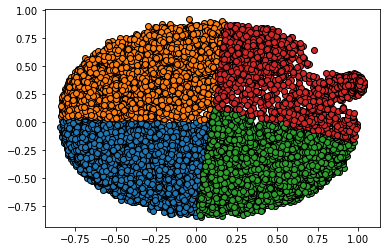

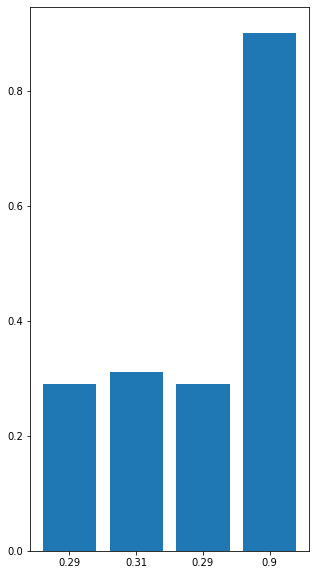

In [ ]:
import copy
def get_mean(data):
    return np.average(data, axis=0)

def get_error(data):
    return np.sum((data-np.average(data, axis=0))**2)

def get_best_split(data, dh_labels):

  mini = float("inf")
  mini_index = 0

  for i in range(0, np.unique(dh_labels).size):
    centre = np.mean(data[dh_labels==i], axis=0).T

    newon = np.sum(np.mean((data[dh_labels==i]-centre)**2, axis=0))
    if newon < mini :
      mini_index=i
      mini=newon
     
  return mini_index
def divisive_cluster(data):
  num_clusters = 3
  data_to_divide = data

  dh_labs = np.zeros(data.shape[0])
  cluster_to_divide=0
  clusters=[]
  errors=[]
  cou=0
  for i in range(4):
    print(cou)
    kmodel = KMeans(n_clusters=2, random_state=0).fit(data_to_divide)
    dh_labels=kmodel.labels_
    clusters.append(data_to_divide[dh_labels==0])
    clusters.append(data_to_divide[dh_labels==1])
    if(len(clusters)==4):
      break
    errors.append(get_error(np.array(data_to_divide[dh_labels==0])))
    errors.append(get_error(np.array(data_to_divide[dh_labels==1])))
    data_to_divide = clusters[errors.index(max(errors))]
   
    clusters.pop(errors.index(max(errors)))
    errors.pop(errors.index(max(errors)))
    
    if(len(data_to_divide.values)<2):
      break
    cou=cou+1
  col = 'k'
  
  plt.plot(clusters[0].iloc[:, 0], clusters[0].iloc[:, 1], 'o', 
              markeredgecolor='k',
              markersize=6)
  plt.plot(clusters[1].iloc[:, 0], clusters[1].iloc[:, 1], 'o', 
              markeredgecolor='k',
              markersize=6)
  plt.plot(clusters[2].iloc[:, 0], clusters[2].iloc[:, 1], 'o', 
              markeredgecolor='k',
              markersize=6)
  plt.plot(clusters[3].iloc[:, 0], clusters[3].iloc[:, 1], 'o', 
              markeredgecolor='k',
              markersize=6)
  
  c1=np.array(clusters[0])
  c2=np.array(clusters[1])
  c3=np.array(clusters[2])
  c4=np.array(clusters[3])

  avg_c1=np.average(c1,axis=0)
  avg_c2=np.average(c2,axis=0)
  avg_c3=np.average(c3,axis=0)
  avg_c4=np.average(c4,axis=0)

  c1_intra=np.sum(np.sqrt(np.sum(np.square(c1-avg_c1),axis=1)),axis=0)/c1.shape[0]
  c2_intra=np.sum(np.sqrt(np.sum(np.square(c2-avg_c2),axis=1)),axis=0)/c2.shape[0]
  c3_intra=np.sum(np.sqrt(np.sum(np.square(c3-avg_c3),axis=1)),axis=0)/c3.shape[0]
  c4_intra=np.sum(np.sqrt(np.sum(np.square(c4-avg_c3),axis=1)),axis=0)/c4.shape[0]
  final_avg=[round(c1_intra,2),round(c2_intra,2),round(c3_intra,2),round(c4_intra,2)]
  x=['c1','c2','c3','c4']
  y=final_avg
  fig, ax = plt.subplots(figsize=(5, 10))
  ax.bar(x,y)
  plt.xticks(x, y)
  plt.show()

    

divisive_cluster(X_principal)


In [ ]:
def intra_similarity(labels):
  c1=[]
  c2=[]
  c3=[]
  c4=[]
  for sample,each  in zip(data.values,labels):
    if(each==0):
      c1.append(sample)
    elif(each==1):
      c2.append(sample)
    elif(each==2):
      c3.append(sample)
    else:
      c4.append(sample)
  c1=np.array(c1)
  c2=np.array(c2)
  c3=np.array(c3)
  c4=np.array(c4)

  avg_c1=np.average(c1,axis=0)
  avg_c2=np.average(c2,axis=0)
  avg_c3=np.average(c3,axis=0)
  avg_c4=np.average(c4,axis=0)

  c1_intra=np.sum(np.sqrt(np.sum(np.square(c1-avg_c1),axis=1)),axis=0)/c1.shape[0]
  c2_intra=np.sum(np.sqrt(np.sum(np.square(c2-avg_c2),axis=1)),axis=0)/c2.shape[0]
  c3_intra=np.sum(np.sqrt(np.sum(np.square(c3-avg_c3),axis=1)),axis=0)/c3.shape[0]
  c4_intra=np.sum(np.sqrt(np.sum(np.square(c4-avg_c3),axis=1)),axis=0)/c4.shape[0]


  final_avg=[round(c1_intra,2),round(c2_intra,2),round(c3_intra,2),round(c4_intra,2)]
  return final_avg

intra_similarity(labels)
x=['c1','c2','c3','c4']
y=intra_similarity(ac4.labels_)
fig, ax = plt.subplots(figsize=(5, 10))
ax.bar(x,y)
plt.xticks(x, y)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


AxisError: ignored